In [1]:
# Simple code to load in a plots some of the Adverse Weather Scenarios for Future Electricity Systems data

# Hannah Bloomfield 17th June 2021

# Load in python libraries (libraries may need to be installed first in a virtual environ)
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from datetime import date, timedelta
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy


In [2]:
# Data repository on CEDA

dataset_loc = '/badc/deposited2021/adverse_met_scenarios_electricity/data/'

# Open one relevant netcdf file - e.g. UK winter wind drought, one of the most extreme events in terms of duration:

# Location of the event of interest
file_str = dataset_loc + 'winter_wind_drought/uk/most_extreme_events/duration/event1/winter_wind_drought_uk_most_extreme_events_duration_event1_tas.nc'
 
# Open the temperature data file
dataset = Dataset(file_str,mode='r')
# see the file inputs and netcdf dictionary keys to load:
print(dataset.variables.keys())
lons = dataset.variables['longitude'][:]
lats = dataset.variables['latitude'][:]
# convert temperature from Kelvin to Degrees celsius
temperature = dataset.variables['t2m'][:] -273.15 # data in shape [time,lat,lon]
time = dataset.variables['time'][:]
dataset.close()


odict_keys(['longitude', 'latitude', 'time', 't2m'])


In [3]:
# Turn time into a date (time is hours since 1970-01-01 00:00:00)
start = date(1970,1,1)
date_conv = []
for i in range(0,len(time)):
    delta_temp = timedelta(hours=np.int(time[i]))
    date_conv.append(start + delta_temp)


/opt/jaspy/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


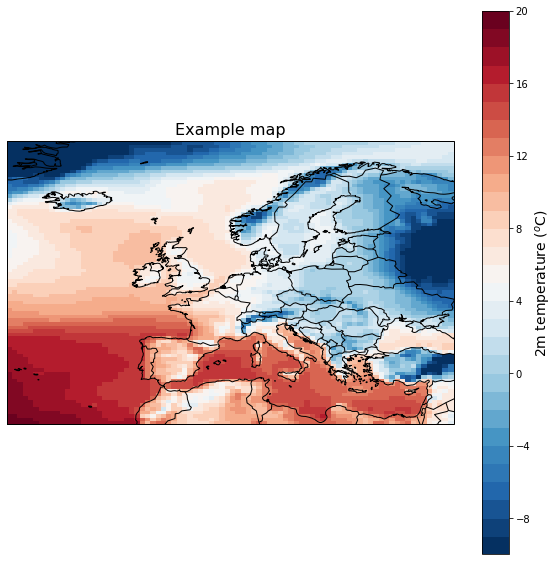

In [4]:
# make a grid of the lats and lons.
gridded_lons,gridded_lats = np.meshgrid(lons,lats)


# Spatial plot of the first day of data


# setup colorbar
bounds = np.linspace(-10,20,31)
cmap = plt.cm.RdBu_r
norm = mpl.colors.BoundaryNorm(bounds,cmap.N)
# setup plot
fig = plt.figure(figsize=(10,10)) 
ax1 = fig.add_subplot(111,projection=ccrs.PlateCarree())
cs = plt.pcolor(gridded_lons, gridded_lats, temperature[0,:,:],cmap =cmap,norm=norm,transform=ccrs.PlateCarree())
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.title('Example map',fontsize=16)
cb = plt.colorbar()
cb.ax.set_ylabel('2m temperature ($^{o}$C)',fontsize=14)
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.BORDERS)
plt.show()


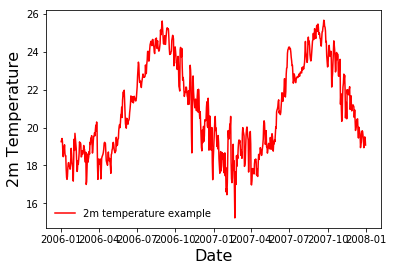

In [5]:
# Time series plot in one grid cell
plt.plot(date_conv,temperature[:,1,1],color='r',label='2m temperature example')
plt.legend(frameon=False)
plt.xlabel('Date',fontsize=16)
plt.ylabel('2m Temperature',fontsize=16)
plt.show()



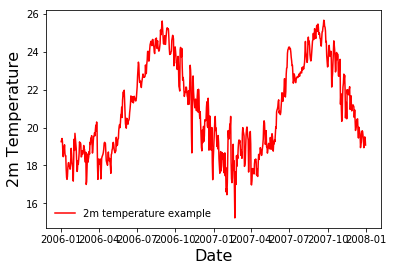

In [7]:


# Time series plot in one grid cell
plt.plot(date_conv,temperature[:,1,1],color='r',label='2m temperature example')
plt.legend(frameon=False)
plt.xlabel('Date',fontsize=16)
plt.ylabel('2m Temperature',fontsize=16)
plt.show()



In [8]:
# Similar for wind speed:
file_str = dataset_loc + 'winter_wind_drought/uk/most_extreme_events/duration/event1/winter_wind_drought_uk_most_extreme_events_duration_event1_windspeed.nc'
 
# Open the wind speed data file
dataset = Dataset(file_str,mode='r')
# see the file inputs and netcdf dictionary keys to load:
print(dataset.variables.keys())
lons = dataset.variables['longitude'][:]
lats = dataset.variables['latitude'][:]
speed = dataset.variables['wind_speed'][:] # data in shape [time,lat,lon]
time = dataset.variables['time'][:]
gridded_lons,gridded_lats = np.meshgrid(lons,lats)

dataset.close()

odict_keys(['longitude', 'latitude', 'time', 'wind_speed'])


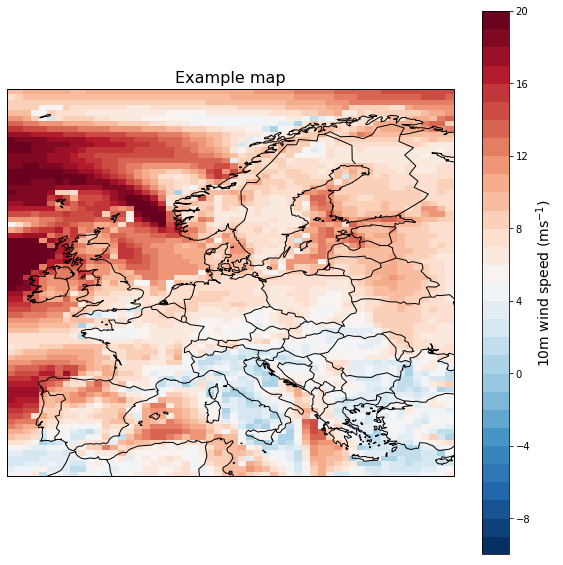

In [9]:

# setup plot
fig = plt.figure(figsize=(10,10)) 
ax1 = fig.add_subplot(111,projection=ccrs.PlateCarree())
cs = plt.pcolor(gridded_lons, gridded_lats, speed[0,:,:],cmap =cmap,norm=norm,transform=ccrs.PlateCarree())
cb = plt.colorbar(cs)
cb.ax.set_ylabel('10m wind speed (ms$^{-1}$)',fontsize=14)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.title('Example map',fontsize=16)
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.BORDERS)
plt.show()


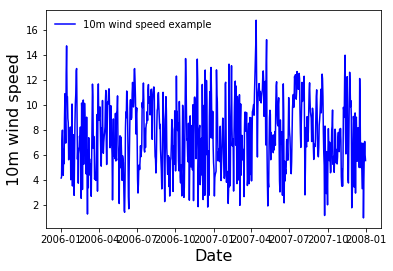

In [10]:
# Time series plot in one grid cell
plt.plot(date_conv,speed[:,1,1],color='b',label='10m wind speed example')
plt.legend(frameon=False)
plt.xlabel('Date',fontsize=16)
plt.ylabel('10m wind speed',fontsize=16)
plt.show()


In [11]:
# Similar for solar radiation:
file_str = dataset_loc + 'winter_wind_drought/uk/most_extreme_events/duration/event1/winter_wind_drought_uk_most_extreme_events_duration_event1_ssr.nc'
 
# Open the solar data file
dataset = Dataset(file_str,mode='r')
# see the file inputs and netcdf dictionary keys to load:
print(dataset.variables.keys())
lons = dataset.variables['longitude'][:]
lats = dataset.variables['latitude'][:]
solar = dataset.variables['ssr'][:] # data in shape [time,lat,lon]
time = dataset.variables['time'][:]

dataset.close()


odict_keys(['longitude', 'latitude', 'time', 'ssr'])


In [12]:
# Turn time into a date (time is hours since 1970-01-01 00:00:00)
start = date(1970,1,1)
date_conv = []
for i in range(0,len(time)):
    delta_temp = timedelta(hours=np.int(time[i]))
    date_conv.append(start + delta_temp)



In [14]:
# Open the solar data file
dataset = Dataset(file_str,mode='r')
# see the file inputs and netcdf dictionary keys to load:
print(dataset.variables.keys())
lons = dataset.variables['longitude'][:]
lats = dataset.variables['latitude'][:]
solar = dataset.variables['ssr'][:] # data in shape [time,lat,lon]
time = dataset.variables['time'][:]
dataset.close()
# Turn time into a date (time is hours since 1970-01-01 00:00:00)
start = date(1970,1,1)
date_conv = []
for i in range(0,len(time)):
    delta_temp = timedelta(hours=np.int(time[i]))
    date_conv.append(start + delta_temp)


gridded_lons,gridded_lats = np.meshgrid(lons,lats)


odict_keys(['longitude', 'latitude', 'time', 'ssr'])


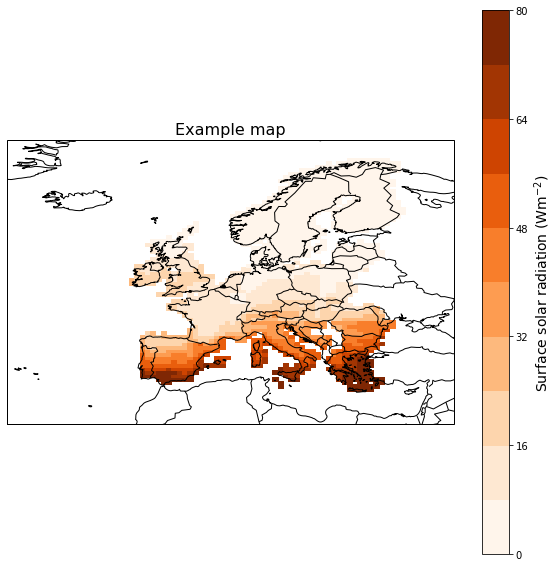

In [15]:
gridded_lons,gridded_lats = np.meshgrid(lons,lats)

# setup colorbar
bounds = np.linspace(0,80,11)
cmap = plt.cm.Oranges
norm = mpl.colors.BoundaryNorm(bounds,cmap.N)

# setup plot
fig = plt.figure(figsize=(10,10)) 
ax1 = fig.add_subplot(111,projection=ccrs.PlateCarree())
cs = plt.pcolor(gridded_lons, gridded_lats, solar[0,:,:],cmap =cmap,norm=norm,transform=ccrs.PlateCarree())
cb = plt.colorbar(cs)
cb.ax.set_ylabel('Surface solar radiation (Wm$^{-2}$)',fontsize=14)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.title('Example map',fontsize=16)
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.BORDERS)
plt.show()


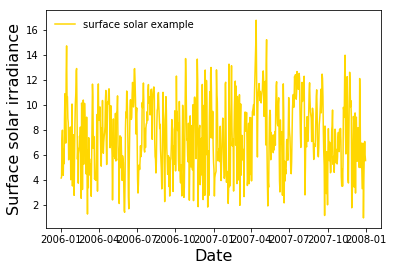

In [16]:
# Time series plot in one grid cell
plt.plot(date_conv,speed[:,1,1],color='gold',label='surface solar example')
plt.legend(frameon=False)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Surface solar irradiance',fontsize=16)
plt.show()
